ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

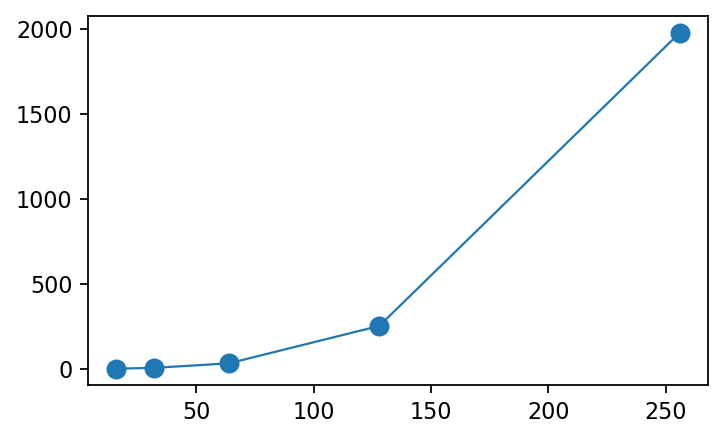

In [3]:
import matplotlib.pyplot as plt
import numpy as np
chi = [16,32,64,128,256]
chi_D2 = [16,32,64,128, 256]

cytnx_net_D4 = [ 0.0008480572141706944,0.0029177868273109198,0.012727077119052416 ,0.07184179988689722 ]
cytnx_ctm_D4 = [0.32013613008894026 ,1.692652429221198 ,12.281761571997777 ,99.27843990805559   ]

cytnx_net_D2 = [7.373280823230743e-058 ,0.00014453590847551823 ,0.00048653222620487213 ,0.0023731540422886615 , 0.015818132087588315   ]
cytnx_ctm_D2 = [0.029253358719870448 ,0.07849376928061247 ,0.34478853712789714 , 1.9617679587099701 ,13.096749335993081 ]
cytnx_ctm_D2_gpu = [0.029253358719870448 ,0.07849376928061247 ,0.34478853712789714 , 1.9617679587099701 ,11.896749335993081 ]



torch_net_D4 = [0.0009080399759113789, 0.0029087369330227375, 0.016283655073493726,0.10747402790002525]
torch_ctm_D4 = [0.2947783009149134, 1.6139272323343903, 12.551500344416127, 99.30990925733931]

torch_net_D2 = [ 0.0006138780154287815, 0.0006959920283406973,  0.0007375609129667282, 0.0026979879476130016, 0.017176900058984756]
torch_ctm_D2 = [0.050776669988408685, 0.09419820411130786, 0.3297925132792443, 1.8326073784846812, 12.534584653098136]

torch_ctm_D4_gpu = [ 0.8344428092241287,  5.414905546233058, 32.11276545189321, 252.21731616184115, 1978.5488191014156]
cytnx_ctm_D4_gpu = [ 0.8344428092241287,  5.224905546233058, 10.11276545189321, 32.60,0 ]

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
# plt.plot(chi, cytnx_ctm_D4, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4')
plt.plot(chi, torch_ctm_D4_gpu, markersize = 8,marker = 'o',lw = 1,label = 'Pytorch  CTM D = 4 (A100)')
plt.plot(chi, cytnx_ctm_D4_gpu, markersize = 6,marker = '^',lw = 1,label = 'Cytnx CTM D = 4 (A100)')
plt.ylabel("10 iteration time (s)")
plt.xlabel(r'$\chi$')
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.plot(chi_D2, np.asarray(cytnx_ctm_D2)/10, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 2')
plt.plot(chi_D2, np.asarray(torch_ctm_D2)/10, markersize = 6,marker = '^',lw = 1,label = 'Pytorch CTM D = 2')
plt.ylabel("1 iteration time (s)")
plt.xlabel(r'$\chi$')
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.legend()
plt.show()

# fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
# # plt.plot(chi, cytnx_ctm_D4, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4')
# plt.plot(chi, torch_ctm_D4_gpu, markersize = 8,marker = 'o',lw = 1,label = 'Pytorch  CTM D = 4 (A100)')
# plt.plot(chi, torch_ctm_D4, markersize = 6,marker = '^',lw = 1,label = 'Pytorch CTM D = 4')
# plt.ylabel("10 iteration time (s)")
# plt.xlabel(r'$\chi$')
# # ax.set_yscale('log')
# # ax.set_xscale('log')
# plt.legend()
# plt.show()

# fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
# plt.plot(chi_D2, cytnx_net_D2, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 2')
# plt.plot(chi_D2, torch_net_D2, markersize = 6,marker = '^',lw = 1,label = 'Pytorch CTM D = 2')
# plt.ylabel("absorb contraction time (s)")
# plt.xlabel(r'$\chi$')
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.legend()
# plt.show()

# fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
# plt.plot(chi, cytnx_net_D4, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4')
# plt.plot(chi, torch_net_D4, markersize = 6,marker = '^',lw = 1,label = 'Pytorch CTM D = 4')
# plt.ylabel("absorb contraction time (s)")
# plt.xlabel(r'$\chi$')
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.legend()
# plt.show()